In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os
import glob
import sys
import random
import time
import scipy
from keras.optimizers import Adam
import sys
MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)

Using TensorFlow backend.
E:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as

(256, 256)
13056


(-0.5, 255.5, 255.5, -0.5)

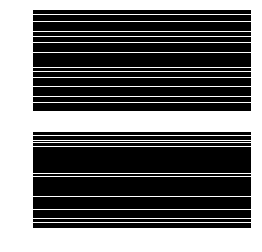

In [2]:
#20%1d mask
res=256
K=[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,0, 0, 0,
 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
D=np.tile(K,[res,1])
D=D.T
imgplot=plt.imshow(D)
print(D.shape)
x_pdf2=D
print((x_pdf2).sum())
imgplot=plt.imshow(D,cmap = "gray")
plt.axis("off")
#51slice，20%rate

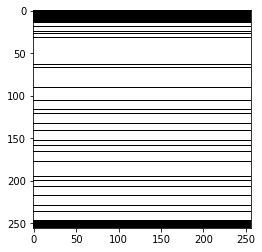

In [3]:
#use no fftshift
var_sampling_mask=1-x_pdf2
var_sampling_mask=np.fft.fftshift(var_sampling_mask)
var_sampling_mask=var_sampling_mask.astype(bool)
plt.figure()
plt.imshow(var_sampling_mask,cmap = "gray")
under_rate = '20'
imshape = (256,256)
norm = np.sqrt(imshape[0]*imshape[1])
nchannels = 2 #complex data real + imag

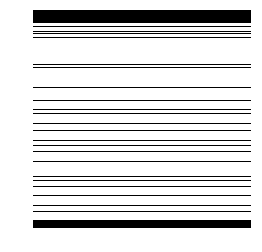

./Test\e14498s5_P60928.7.npy
1


In [4]:
fig = plt.figure()
plt.imshow(var_sampling_mask, cmap = "gray")
plt.axis("off")
plt.show()

out_path = "../Recs"
test_path = "./Test/*.npy"
kspace_files = np.asarray(glob.glob(test_path))
print(kspace_files[-1])
print(len(kspace_files))

In [10]:
## wnet_c5d5_64，DC-CNN，“A Deep Cascade of Convolutional Neural Networks for Dynamic MR Image Reconstruction”
under_rate = '20'
import dcwn_1 as dcwn
mask = np.concatenate((var_sampling_mask[:,:,np.newaxis],var_sampling_mask[:,:,np.newaxis]),axis = -1) > 0
mask = mask.astype(np.float32)
stats = np.load("../Data/stats_fs_unet_norm_2c_20" + under_rate + ".npy")

model = dcwn.wnet_dccnn_5_64(stats[0],stats[1],stats[2],stats[3],mask,
                                   kshape = (5,5),kshape2=(3,3))

opt = Adam()
model.compile(loss = [dcwn.nrmse,dcwn.nrmse],optimizer=opt, loss_weights=[0.01, 0.99])

model_name = "../Models/wnet_dc" + under_rate +"wnet_c5d5_64_1d20_11_17_1.hdf5"
model.load_weights(model_name)
print(model.summary())

E:\pythonenv\env3.6\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


cn1 (?, 256, 256, 2)
ifft2 (?, 256, 256, 2)
o2 (?, 256, 256, 2)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 2)  0                                            
__________________________________________________________________________________________________
lambda_125 (Lambda)             (None, 256, 256, 2)  0           input_3[0][0]                    
__________________________________________________________________________________________________
lambda_126 (Lambda)             (None, 256, 256, 2)  0           lambda_125[0][0]                 
__________________________________________________________________________________________________
lambda_131 (Lambda)             (None, 256, 256, 2)  0           lambda_126[0][0]                 
_____________________________________________

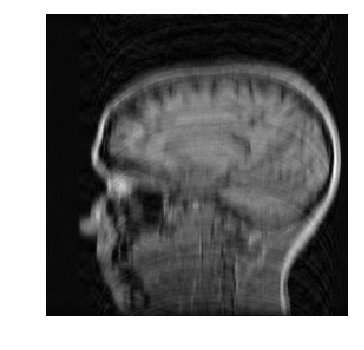

In [11]:
#zero-fill
imshape = (256,256)
norm = np.sqrt(imshape[0]*imshape[1])

for jj in range(len(kspace_files)):
    kspace = np.load(kspace_files[jj])/norm
    kspace2 = kspace.copy()
    kspace[:,var_sampling_mask,:] = 0
    kspace = (kspace-stats[0])/stats[1]
    rec = np.abs(np.fft.ifft2(kspace2[:,:,:,0]+1j*kspace2[:,:,:,1])).astype(np.float64)
    zero_fill=np.abs(np.fft.ifft2(kspace[:,:,:,0]+1j*kspace[:,:,:,1])).astype(np.float64)   
    fig = plt.figure(dpi = 100)
    plt.imshow(zero_fill[100], cmap = "gray")
    plt.axis("off")
    plt.show()

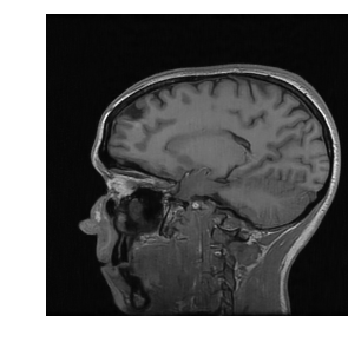

In [12]:
imshape = (256,256)
norm = np.sqrt(imshape[0]*imshape[1])

for jj in range(len(kspace_files)):
    kspace = np.load(kspace_files[jj])/norm
    kspace2 = kspace.copy()
    kspace[:,var_sampling_mask,:] = 0
    kspace = (kspace-stats[0])/stats[1]
    rec = np.abs(np.fft.ifft2(kspace2[:,:,:,0]+1j*kspace2[:,:,:,1])).astype(np.float64)
    pred0 = model.predict(kspace)[1].astype(np.float64)
    pred=np.abs(pred0[:,:,:,0]+1j*pred0[:,:,:,1])
    fig = plt.figure(dpi = 100)
    plt.imshow(pred[100] , cmap = "gray")
    plt.axis("off")

(-0.5, 89.5, 54.5, -0.5)

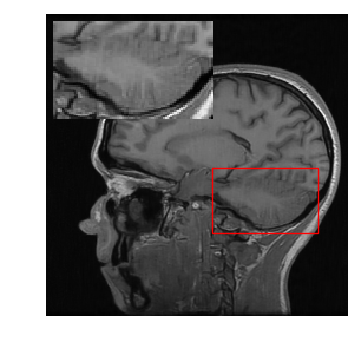

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.patches as patches

# import PIL.Image as img
x1, x2, y1, y2 = 140, 230, 130, 185
fig, ax = plt.subplots(dpi = 100)
ax.imshow(pred[100] , cmap = "gray")
ax.add_patch(patches.Rectangle((x1,y1),90,55,linewidth=1,edgecolor='red',fill=False))
ax.axis("off")
axins = zoomed_inset_axes(ax, 1.5, loc=2) 
axins.imshow(pred[100,y1:y2,x1:x2] , cmap = "gray")
axins.axis("off")

In [14]:
#compare psnr and ssim
import math
from skimage.measure import compare_ssim
def psnr2(target, ref,ma,mi):
    # assume RGB image
    target_data = np.array(target, dtype=float)
    ref_data = np.array(ref, dtype=float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(np.mean(diff ** 2.))
    nrmse=rmse/(ma-mi)

    return 20 * math.log10(ma/ rmse),nrmse 

from skimage.measure import compare_ssim
psnr_all_nonzero = np.zeros(shape=(len(pred)))
nrmse_all_nonzero= np.zeros(shape=(len(pred)))
ssim_all_nonzero = np.zeros(shape=(len(pred)))
rate_all_nonzero = np.zeros(shape=(len(pred)))
ma=np.max(rec)
mi=np.min(rec)
print(np.max(pred))
print(np.max(rec))
print(np.min(rec))
for i in range(len(pred)):

    psnr_all_nonzero[i],nrmse_all_nonzero[i]=psnr2(pred[i,:,:],rec[i,:,:],ma,mi)
    ssim_all_nonzero[i],diff_all=compare_ssim(pred[i,:,:],rec[i,:,:],full=True,data_range=ma-mi)
print(np.mean(psnr_all_nonzero[20:-20]))
print(psnr_all_nonzero)
print(np.mean(nrmse_all_nonzero[20:-20]))
print(nrmse_all_nonzero)
print(np.mean(ssim_all_nonzero[20:-20]))
print(ssim_all_nonzero)

26.919165007728452
28.58245272874974
0.07967612736810449
35.18219444995515
[46.97471605 46.90077618 46.90556601 46.96463281 46.90780668 46.90444402
 46.80316259 46.82395538 46.50566397 45.58023455 44.83317472 43.53534149
 42.48333877 41.99300319 41.48538618 41.80381112 41.33119862 40.85135408
 40.25779434 39.75700901 39.80877445 39.16712542 39.08765219 38.30036011
 38.24905696 37.97645442 37.42682539 37.00859351 37.05094945 36.850978
 36.63028381 36.41412241 36.45461466 35.83084594 36.20736707 36.12459631
 36.02906621 35.62580405 35.48428317 35.46556126 35.10131673 34.65993067
 34.62118056 34.09326432 33.80860337 33.7178835  33.6583781  33.7761369
 33.7331006  33.714407   33.8947864  33.99039342 33.99053549 34.23673965
 33.87207919 34.02204084 33.93830355 33.98731993 33.7458214  33.6843714
 33.46095771 33.28126509 33.20729373 33.43625859 33.52919442 33.58217514
 33.34324577 33.42386622 33.58611123 33.89362377 33.58281389 33.21235303
 33.53058121 33.55913932 33.41269379 33.50587009 33.4

In [5]:
# wnet_c5d5_uca_cscasde_5_32，uca,“MRI reconstruction via cascaded channel-wise attention network,”
under_rate = '20'
import dcwn_1 as dcwn
mask = np.concatenate((var_sampling_mask[:,:,np.newaxis],var_sampling_mask[:,:,np.newaxis]),axis = -1) > 0
mask = mask.astype(np.float32)
stats = np.load("../Data/stats_fs_unet_norm_2c_20" + under_rate + ".npy")

model = dcwn.wnet_cca_cscasde_5_32(stats[0],stats[1],stats[2],stats[3],mask,
                                   kshape = (5,5),kshape2=(3,3))

opt = Adam()
model.compile(loss = [dcwn.nrmse,dcwn.nrmse],optimizer=opt, loss_weights=[0.01, 0.99])
model_name = "../Models/wnet_dc" + under_rate +"wnet_c5d5_cca_cscasde_5_32_1d20_12_9_2.hdf5"
# model.load_weights(model_name)
model.load_weights(model_name)
print(model.summary())

E:\pythonenv\env3.6\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


se1 shepe (?, 1, 1, 128)
se2 shepe (?, 1, 1, 16)
se3 shepe (?, 1, 1, 128)
se1 shepe (?, 1, 1, 32)
se2 shepe (?, 1, 1, 4)
se3 shepe (?, 1, 1, 32)
se1 shepe (?, 1, 1, 32)
se2 shepe (?, 1, 1, 4)
se3 shepe (?, 1, 1, 32)
cn1 (?, 256, 256, 2)
ifft2 (?, 256, 256, 2)
se1 shepe (?, 1, 1, 128)
se2 shepe (?, 1, 1, 16)
se3 shepe (?, 1, 1, 128)
se1 shepe (?, 1, 1, 32)
se2 shepe (?, 1, 1, 4)
se3 shepe (?, 1, 1, 32)
se1 shepe (?, 1, 1, 32)
se2 shepe (?, 1, 1, 4)
se3 shepe (?, 1, 1, 32)
se1 shepe (?, 1, 1, 128)
se2 shepe (?, 1, 1, 16)
se3 shepe (?, 1, 1, 128)
se1 shepe (?, 1, 1, 32)
se2 shepe (?, 1, 1, 4)
se3 shepe (?, 1, 1, 32)
se1 shepe (?, 1, 1, 32)
se2 shepe (?, 1, 1, 4)
se3 shepe (?, 1, 1, 32)
se1 shepe (?, 1, 1, 128)
se2 shepe (?, 1, 1, 16)
se3 shepe (?, 1, 1, 128)
se1 shepe (?, 1, 1, 32)
se2 shepe (?, 1, 1, 4)
se3 shepe (?, 1, 1, 32)
se1 shepe (?, 1, 1, 32)
se2 shepe (?, 1, 1, 4)
se3 shepe (?, 1, 1, 32)
se1 shepe (?, 1, 1, 128)
se2 shepe (?, 1, 1, 16)
se3 shepe (?, 1, 1, 128)
se1 shepe (?, 1, 1

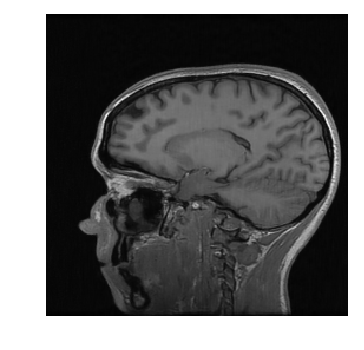

In [6]:
imshape = (256,256)
norm = np.sqrt(imshape[0]*imshape[1])

for jj in range(len(kspace_files)):
    kspace = np.load(kspace_files[jj])/norm
    kspace2 = kspace.copy()
    kspace[:,var_sampling_mask,:] = 0
    kspace = (kspace-stats[0])/stats[1]
    rec = np.abs(np.fft.ifft2(kspace2[:,:,:,0]+1j*kspace2[:,:,:,1])).astype(np.float64)
    pred0 = model.predict(kspace)[1].astype(np.float64)
    pred=np.abs(pred0[:,:,:,0]+1j*pred0[:,:,:,1])
    fig = plt.figure(dpi = 100)
    plt.imshow(pred[100] , cmap = "gray")
    plt.axis("off")

(-0.5, 89.5, 54.5, -0.5)

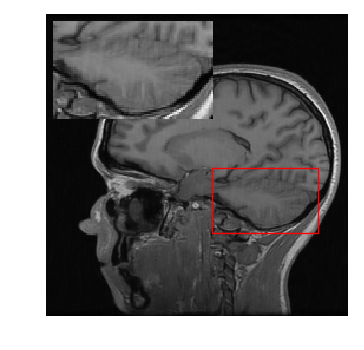

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.patches as patches

# import PIL.Image as img
x1, x2, y1, y2 = 140, 230, 130, 185
fig, ax = plt.subplots(dpi = 100)
ax.imshow(pred[100] , cmap = "gray")
ax.add_patch(patches.Rectangle((x1,y1),90,55,linewidth=1,edgecolor='red',fill=False))
ax.axis("off")
axins = zoomed_inset_axes(ax, 1.5, loc=2) 
axins.imshow(pred[100,y1:y2,x1:x2] , cmap = "gray")
axins.axis("off")

In [8]:
#compare psnr and ssim
import math
from skimage.measure import compare_ssim
def psnr2(target, ref,ma,mi):
    # assume RGB image
    target_data = np.array(target, dtype=float)
    ref_data = np.array(ref, dtype=float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(np.mean(diff ** 2.))
    nrmse=rmse/(ma-mi)

    return 20 * math.log10(ma/ rmse),nrmse 

from skimage.measure import compare_ssim
psnr_all_nonzero = np.zeros(shape=(len(pred)))
nrmse_all_nonzero= np.zeros(shape=(len(pred)))
ssim_all_nonzero = np.zeros(shape=(len(pred)))
rate_all_nonzero = np.zeros(shape=(len(pred)))
ma=np.max(rec)
mi=np.min(rec)
print(np.max(pred))
print(np.max(rec))
print(np.min(rec))
for i in range(len(pred)):
    psnr_all_nonzero[i],nrmse_all_nonzero[i]=psnr2(pred[i,:,:],rec[i,:,:],ma,mi)
    ssim_all_nonzero[i],diff_all=compare_ssim(pred[i,:,:],rec[i,:,:],full=True,data_range=ma-mi)
print(np.mean(psnr_all_nonzero[20:-20]))
print(psnr_all_nonzero)
print(np.mean(nrmse_all_nonzero[20:-20]))
print(nrmse_all_nonzero)
print(np.mean(ssim_all_nonzero[20:-20]))
print(ssim_all_nonzero)

27.169474394260746
28.58245272874974
0.07967612736810449
35.40846487570485
[47.00384288 46.93792838 46.93420098 47.00064862 46.94679153 46.93494267
 46.84406597 46.89578115 46.54255968 45.88969061 45.0827042  43.78080087
 42.72969621 42.09738507 41.87538859 41.83139132 41.3902631  40.87324348
 40.60837335 40.21411428 39.91977685 39.2602462  39.27732235 38.62896131
 38.13036008 38.10172929 37.54504295 37.19205746 37.12093181 36.74444518
 36.73099964 36.48008658 36.53034799 35.9375699  36.27901851 36.24707741
 36.05014504 35.70168791 35.83448624 35.58922664 35.33227156 34.97752485
 34.8292235  34.33369771 34.09491818 33.88363876 33.70888596 33.80381596
 33.8827031  33.89379201 34.21412836 34.16279061 34.24183072 34.55141265
 34.27999231 34.26796102 34.01351328 34.22290401 34.0478621  33.8571692
 33.53659058 33.35635178 33.28667979 33.63934792 33.74036527 33.67557014
 33.66322179 33.6964564  33.94575763 34.18455062 33.95694577 33.49756828
 33.75790647 33.6664046  33.74500392 33.92012693 3

In [9]:
# ddd_c10d10_32_dense_block_ca1d_dwt_noshortcut01_cartfirst，DCWN
under_rate = '20'
import dcwn_1 as dcwn
mask = np.concatenate((var_sampling_mask[:,:,np.newaxis],var_sampling_mask[:,:,np.newaxis]),axis = -1) > 0
mask = mask.astype(np.float32)
stats = np.load("../Data/stats_fs_unet_norm_2c_20" + under_rate + ".npy")

model = dcwn.ddd_c10d10_32_dense_block_ca1d_dwt_noshortcut01_cartfirst(stats[0],stats[1],stats[2],stats[3],mask,
                                   kshape = (5,5),kshape2=(3,3))

opt = Adam()
model.compile(loss = [dcwn.nrmse,dcwn.nrmse],optimizer=opt, loss_weights=[0.01, 0.99])
model_name = "../Models/wnet_dc" + under_rate +"ddd_c10d10_32_dense_block_ca1d_dwt_noshortcut01_cartfirst_1dR5_2020_1_9.hdf5"
# model.load_weights(model_name)
model.load_weights(model_name)
print(model.summary())

E:\pythonenv\env3.6\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


se shape (?, 32)
se 2 shape (?, 1, 1, 32)
cn1 (?, 256, 256, 2)
se shape (?, 32)
se 2 shape (?, 1, 1, 32)
cn2 (?, 256, 256, 2)
se shape (?, 32)
se 2 shape (?, 1, 1, 32)
cn3 (?, 256, 256, 2)
se shape (?, 32)
se 2 shape (?, 1, 1, 32)
cn4 (?, 256, 256, 2)
se shape (?, 32)
se 2 shape (?, 1, 1, 32)
cn5 (?, 256, 256, 2)
se shape (?, 32)
se 2 shape (?, 1, 1, 32)
cn6 (?, 256, 256, 2)
se shape (?, 32)
se 2 shape (?, 1, 1, 32)
cn7 (?, 256, 256, 2)
se shape (?, 32)
se 2 shape (?, 1, 1, 32)
cn8 (?, 256, 256, 2)
se shape (?, 32)
se 2 shape (?, 1, 1, 32)
cn9 (?, 256, 256, 2)
se shape (?, 32)
se 2 shape (?, 1, 1, 32)
cn10 (?, 256, 256, 2)
o2 (?, 256, 256, 2)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 2)  0                                            
____________________________________________________

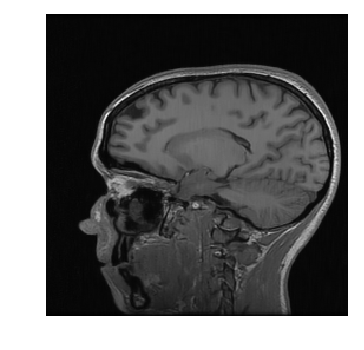

In [10]:
imshape = (256,256)
norm = np.sqrt(imshape[0]*imshape[1])

for jj in range(len(kspace_files)):
    kspace = np.load(kspace_files[jj])/norm
    kspace2 = kspace.copy()
    kspace[:,var_sampling_mask,:] = 0
    kspace = (kspace-stats[0])/stats[1]
    rec = np.abs(np.fft.ifft2(kspace2[:,:,:,0]+1j*kspace2[:,:,:,1])).astype(np.float64)
    pred0 = model.predict(kspace)[1].astype(np.float64)
    pred=np.abs(pred0[:,:,:,0]+1j*pred0[:,:,:,1])
    fig = plt.figure(dpi = 100)
    plt.imshow(pred[100] , cmap = "gray")
    plt.axis("off")

(-0.5, 89.5, 54.5, -0.5)

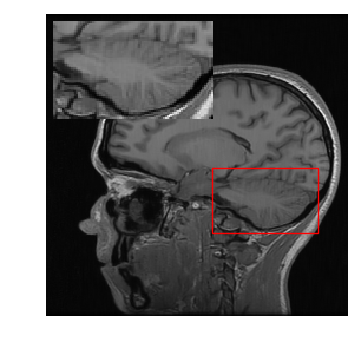

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.patches as patches

# import PIL.Image as img
x1, x2, y1, y2 = 140, 230, 130, 185
fig, ax = plt.subplots(dpi = 100)
ax.imshow(pred[100] , cmap = "gray")
ax.add_patch(patches.Rectangle((x1,y1),90,55,linewidth=1,edgecolor='red',fill=False))
ax.axis("off")
axins = zoomed_inset_axes(ax, 1.5, loc=2) 
axins.imshow(pred[100,y1:y2,x1:x2] , cmap = "gray")
axins.axis("off")

In [12]:
#compare psnr and ssim
import math
from skimage.measure import compare_ssim
def psnr2(target, ref,ma,mi):
    # assume RGB image
    target_data = np.array(target, dtype=float)
    ref_data = np.array(ref, dtype=float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(np.mean(diff ** 2.))
    nrmse=rmse/(ma-mi)

    return 20 * math.log10(ma/ rmse),nrmse 

from skimage.measure import compare_ssim
psnr_all_nonzero = np.zeros(shape=(len(pred)))
nrmse_all_nonzero= np.zeros(shape=(len(pred)))
ssim_all_nonzero = np.zeros(shape=(len(pred)))
rate_all_nonzero = np.zeros(shape=(len(pred)))
ma=np.max(rec)
mi=np.min(rec)
print(np.max(pred))
print(np.max(rec))
print(np.min(rec))
for i in range(len(pred)):
    psnr_all_nonzero[i],nrmse_all_nonzero[i]=psnr2(pred[i,:,:],rec[i,:,:],ma,mi)
    ssim_all_nonzero[i],diff_all=compare_ssim(pred[i,:,:],rec[i,:,:],full=True,data_range=ma-mi)
print(np.mean(psnr_all_nonzero[20:-20]))
print(psnr_all_nonzero)
print(np.mean(nrmse_all_nonzero[20:-20]))
print(nrmse_all_nonzero)
print(np.mean(ssim_all_nonzero[20:-20]))
print(ssim_all_nonzero)

27.30888990934704
28.58245272874974
0.07967612736810449
36.35870715901768
[47.0097765  46.93048189 46.93489879 46.98853465 46.95862219 46.93128354
 46.85580376 46.88665972 46.58920433 46.04506237 45.26056755 44.30343425
 43.03949551 42.75439991 42.46701585 42.59587011 42.1045024  41.88999268
 41.59227989 40.95702265 41.00190226 40.40125349 40.27341315 39.49392652
 39.08511238 39.08580459 38.70084051 38.42755621 38.15126509 37.70317361
 37.84869128 37.65522368 37.42973431 37.02607659 37.40908953 37.48285125
 37.22071503 36.92255588 36.87694093 36.53341523 36.26205101 35.80321445
 35.69614003 35.38617853 35.07528751 34.99137803 34.86279807 34.9374634
 34.83348806 34.81156165 35.08066216 35.01154597 35.2276384  35.44423721
 35.22425995 35.14730314 35.04312695 35.08357592 34.88134583 34.78158611
 34.50717294 34.12016996 34.22044555 34.45339215 34.5322022  34.66151409
 34.70845669 34.84884427 34.84708028 35.06730081 34.83046104 34.37710055
 34.64983154 34.50168332 34.70730942 34.84334395 34